# QAOA for the Max Cut problem

# Libraries used


In [1]:
# Import statements
import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import time

SEED = 420

# The algorithm

In [2]:
def qaoa_maxcut(g, depth, updates=30, show=False, print_update_every=100):
    cost_h, mixer_h = qaoa.maxcut(g)

    def qaoa_layer(gamma, beta):
        qaoa.cost_layer(gamma, cost_h)
        qaoa.mixer_layer(beta, mixer_h)

    wires = range(g.order())

    def circuit(ps):
        for w in wires:
            qml.Hadamard(wires=w)
        qml.layer(qaoa_layer, depth, ps[0], ps[1])

    dev = qml.device("lightning.qubit", wires=wires, shots=20)

    @qml.qnode(dev)
    def cost_function(ps):
        circuit(ps)
        return qml.expval(cost_h)

    optimizer = qml.AdagradOptimizer(stepsize=0.5)
    init_params = 0.01 * np.random.rand(2, depth, requires_grad=True)
    params = init_params.copy()
    for i in range(updates):
        params = optimizer.step(cost_function, params)
        if show and (i + 1) % print_update_every == 0:
            print(f"Objective after step {i+1:3d}: {-cost_function(params): .7f}")

    if show:
        print("Optimal Parameters")
        print(params)

    @qml.qnode(dev)
    def probability_circuit(gamma, alpha):
        circuit([gamma, alpha])
        return qml.probs(wires=wires)

    probs = probability_circuit(params[0], params[1])
    approx_cost = -cost_function(params)

    return params, approx_cost, probs

# Experimental setup for different problem classes

In [3]:
class Experiment:
    def __init__(self, generator, size, max_depth=2, d=None):
        if d is None:
            self.dataset = [generator(n) for n in range(4, size)]
        else:
            self.dataset = []
            for n in range(4, size):
                if n % 2 == 0:
                    self.dataset.append(generator(n, d, seed=SEED))
                    
        self.size = size
        self.max_depth = max_depth

        self.params = []
        self.approx_costs = []
        self.probs = []
        self.quantum_time = []

        self.true_costs = []
        self.classical_time = []

    def example(self):
        graph = self.dataset[-1]
        positions = nx.spring_layout(graph, seed=SEED)
        nx.draw(graph, with_labels=True, pos=positions)

    def plot_probs(self, i):
        plt.style.use("seaborn")
        labels = [bin(n) for n in range(len(self.probs[i]))]
        plt.bar(labels, self.probs[i])
        plt.show()

    def quantum_solve(self):
        for p in range(1, self.max_depth + 1):
            pa, ac, pr, t = [], [], [], []
            for graph in self.dataset:
                start_time = time.perf_counter()
                r1, r2, r3 = qaoa_maxcut(graph, p)
                end_time = time.perf_counter()
                pa.append(r1)
                ac.append(r2)
                pr.append(r3)
                t.append(end_time - start_time)
            self.params.append(pa)
            self.approx_costs.append(ac)
            self.probs.append(pr)
            self.quantum_time.append(t)

    def classical_solve(self):
        for graph in self.dataset:
            start_time = time.perf_counter()
            cost, _ = nx.approximation.one_exchange(graph)
            end_time = time.perf_counter()
            self.classical_time.append(end_time - start_time)
            self.true_costs.append(cost)

    def results(self):
        plt.style.use("seaborn")
        plotting = []
        for i in range(self.max_depth):
            plt.plot(range(4, self.size), self.approx_costs[i], label="")

        plt.legend(loc="upper left")
        plt.title("QAOA for Max Cut on ")
        plt.xlabel("Size of the graph")
        plt.ylabel("Approximation cost")
        plt.ylim(ymin=0)
        # int for x axis
        plt.show()

In [4]:
# Experiments
SIZE = 6
SIZE = SIZE + 1
DEPTH = 4

cycle_graphs = Experiment(nx.cycle_graph, SIZE)
complete_graphs = Experiment(nx.complete_graph, SIZE)
# three_regular_graphs = Experiment(nx.random_regular_graph, SIZE, d=3)

ladder_graphs = Experiment(nx.ladder_graph, SIZE)
circular_ladder_graphs = Experiment(nx.circular_ladder_graph, SIZE)

wheel_graphs = Experiment(nx.wheel_graph, SIZE)
star_graphs = Experiment(nx.star_graph, SIZE)


# Results

## Maximum circuit depth = 3

## Maximum graph size = 10

## Approximation ratio = Approximate cost / True cost

## Cycle graph

In [ ]:
cycle_graphs.quantum_solve()

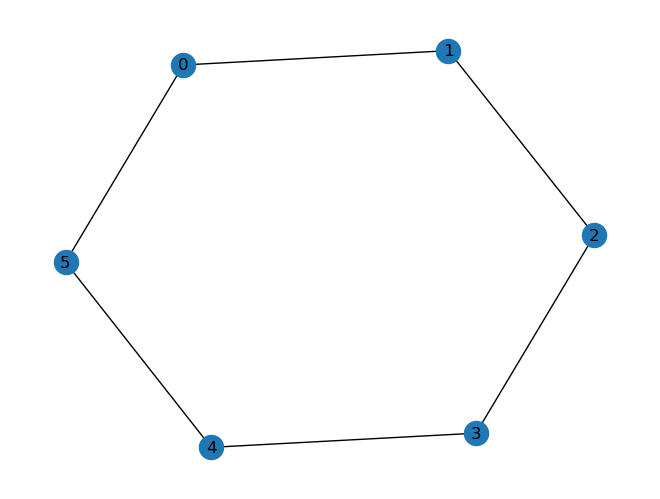

In [5]:
cycle_graphs.example()

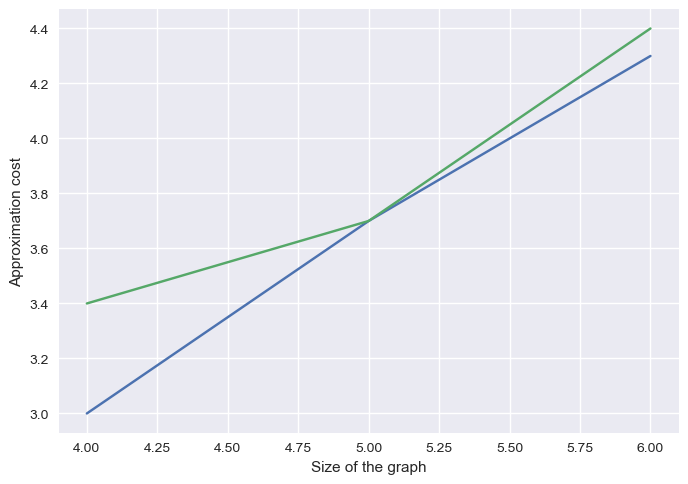

In [34]:
cycle_graphs.results()

## Complete graph

In [ ]:
complete_graphs.quantum_solve()

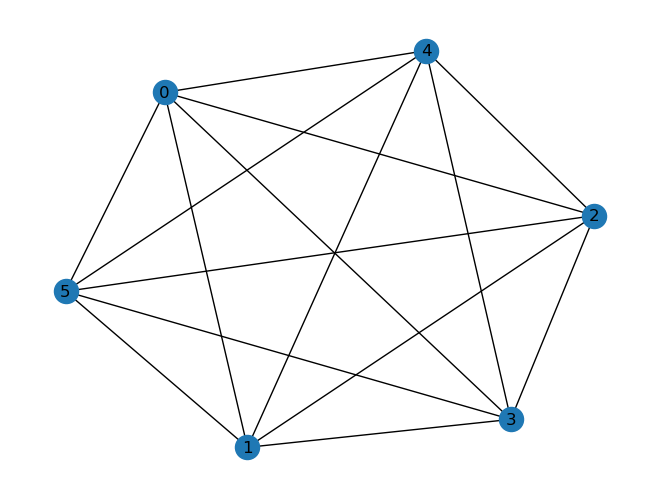

In [6]:
complete_graphs.example()

In [ ]:
complete_graphs.results()

## 3-regular graph

In [ ]:
# solve

In [7]:
# example

In [ ]:
# results

## Ladder graphs

In [ ]:
ladder_graphs.quantum_solve()

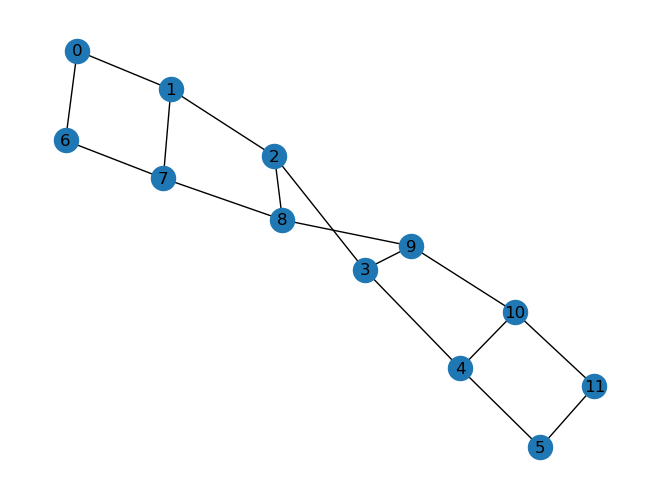

In [8]:
ladder_graphs.example()

In [ ]:
ladder_graphs.results()

## Circular ladder graphs

In [ ]:
circular_ladder_graphs.quantum_solve()

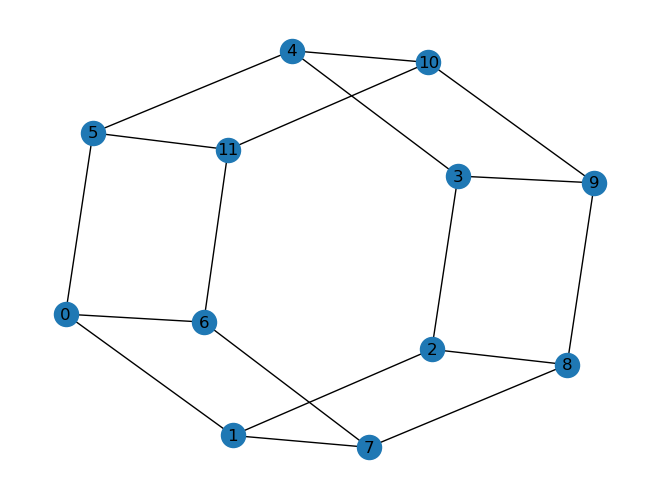

In [12]:
circular_ladder_graphs.example()

In [ ]:
circular_ladder_graphs.results()

## Star graph

In [ ]:
star_graphs.quantum_solve()

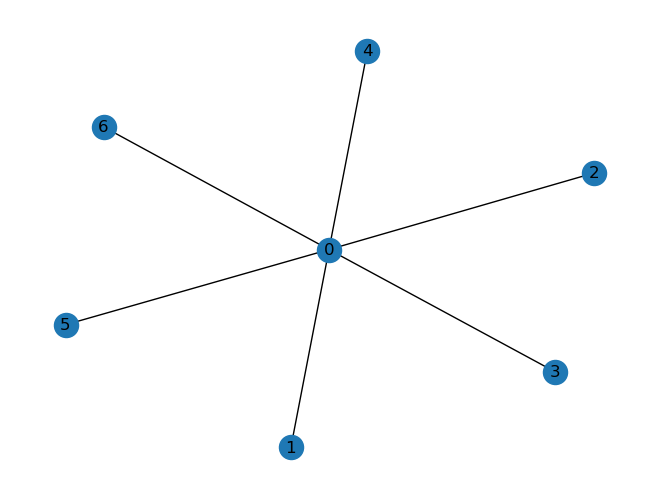

In [11]:
star_graphs.example()

In [ ]:
star_graphs.results()

## Wheel graph

In [ ]:
wheel_graphs.quantum_solve()

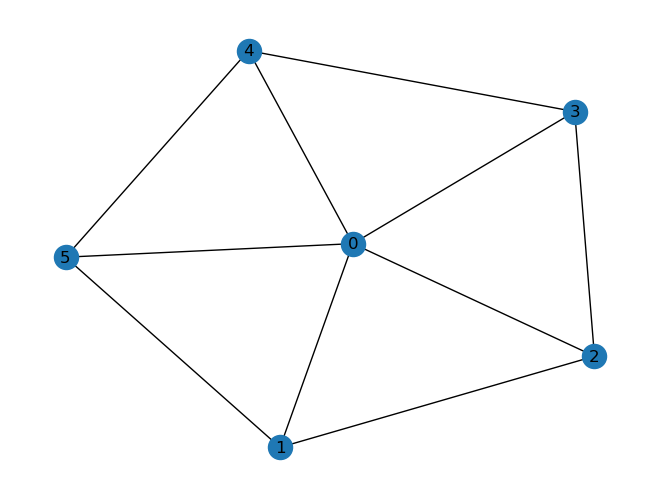

In [10]:
wheel_graphs.example()

In [ ]:
wheel_graphs.results()

## Runtime

In [ ]:
#todo

# References

Code adapted from https://pennylane.ai/qml/demos/tutorial_qaoa_intro


In [14]:
geo = nx.complete_graph(4)
c, _ = nx.approximation.one_exchange(geo)

In [15]:
print(c)

4
